## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

1. I chose to go with 9 different variables (not counting the already included ballot variable to use for my data)
2. First, I picked the year variable, which is a key point to showing data: How stuff changes over time especially when comparing with the other variables I chose. It's simple to clean, but has a powerful purpose. A lot of the other variables that I choose for this assignment go well with seeing how trends work over time, which I will likely depict in a number of graphs when completing step 4.
3. Second, I chose the number of children variable. This variable is great when combined with the year variable because I can combine and see how the number of children in a household can change over time, such as with new healthcare advancements as well as possible anti-birth stuff.
4. Third, I chose education level, specifically, highest year of high school completed. This pairs powerfully with the year variable because education had changed in major ways since 1970's, and being able to showcase that is a reason I chose this variable. This can also pair well with number of children, seeing if education has at all improved people's thoughts of having children.
5. Fourth, I chose Respondents Income. I chose this one because it seemed interested to see how people's income varied across the different factors and how it can change in a major way. I wonder if income is effected as much as people say it is, or if it really depends on the job a the major factor, which is not tracked here
6. Fifth, I chose Region of interview, it can show the spread of these types of places across different regions in the United States. There are major income and school benefits in being in specific regions, such as how in the early USA days the south was more farming, where the north was more education and industry. I wonder if the past benefits of these different regions still translate to differences today or not.
7. Sixth, Political Party Affilitation. I chose this one because I saw it and thought it would be interesting to see if there was any hidden trends between different factors, or anything else that could mean anything. I'm also interested to see how this changes over time with different passing era or past presidents, and how this effects other factors such as Space Exploration.
8. Seventh: Space Exploration Program. This one was really random, seeing how people's opinions are on the space program, and since I am interested in space I definitely want to see how it is effected by different factors. Overall I do know a lot of people don't like how much is being funded here, so I wonder if this is really true.
9. Eighth: Parks and Recreation. Similar to the last one, seeing exactly the trends on opinions, even comparing this to #7.

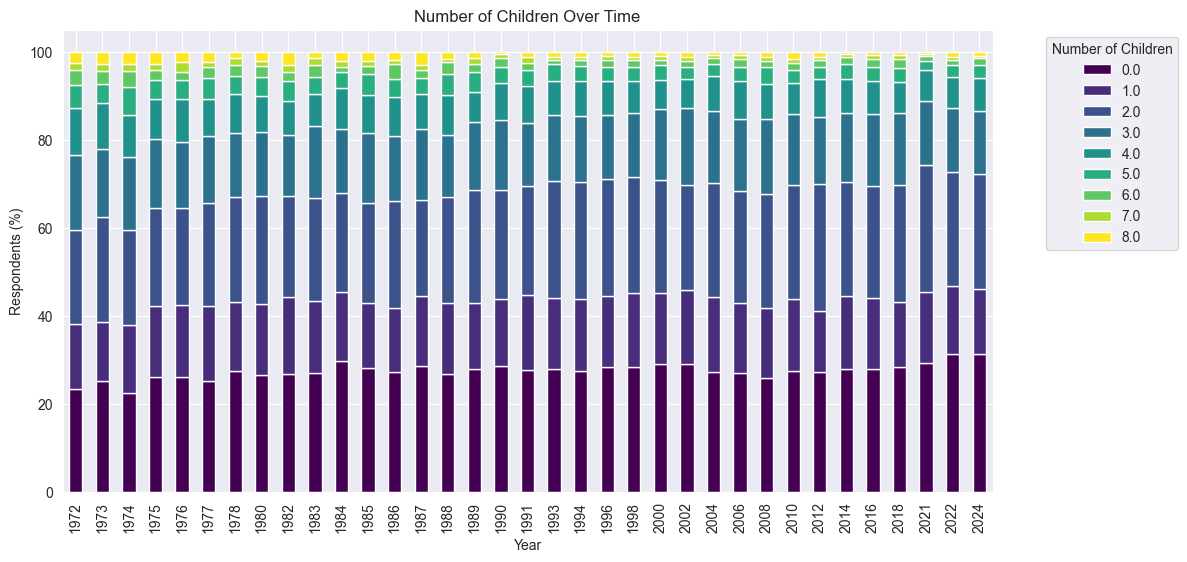

region  Midwest  Northeast  South  West
educ                                   
0.0          29         25    109    26
1.0           7          1     29    13
2.0          18         27     79    37
3.0          40         38    156    39
4.0          45         50    187    47
5.0          77         67    228    42
6.0         131        136    455   167
7.0         147        149    519    91
8.0         897        531   1017   367
9.0         508        399    999   303
10.0        738        574   1317   450
11.0        983        668   1663   732
12.0       6563       4235   7571  3833
13.0       1604        983   2159  1442
14.0       1956       1497   3105  2093
15.0        837        570   1200   877
16.0       2517       2267   3529  2353
17.0        606        473    795   697
18.0        700        693   1038   756
19.0        300        229    352   285
Midwest Mean:  12.880553921830723 
Northeast Mean: 13.05722891566265 
South Mean: 12.571622590259176 
West Mean: 13.3907

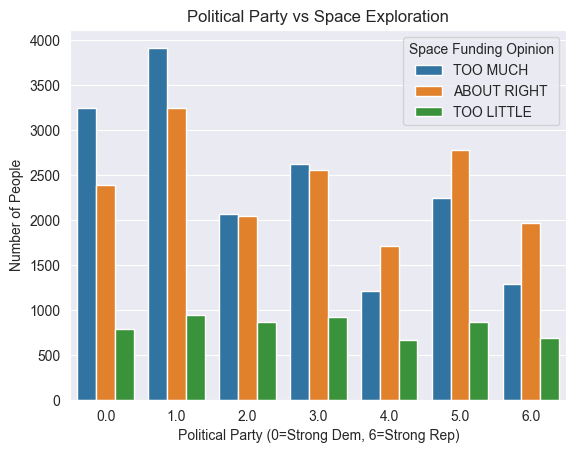

region          Midwest  Northeast  South  West
rincome                                        
$1000 TO 2999       567        320    690   413
$10000 - 14999     1399        921   1890  1019
$15000 - 19999     1090        761   1488   786
$20000 - 24999     1079        755   1547   854
$25000 OR MORE     4873       3696   6632  4420
$3000 TO 3999       318        241    522   244
$4000 TO 4999       301        195    431   202
$5000 TO 5999       306        186    454   234
$6000 TO 6999       269        181    418   189
$7000 TO 7999       266        168    408   209
$8000 TO 9999       477        334    699   362
LT $1000            382        257    487   269


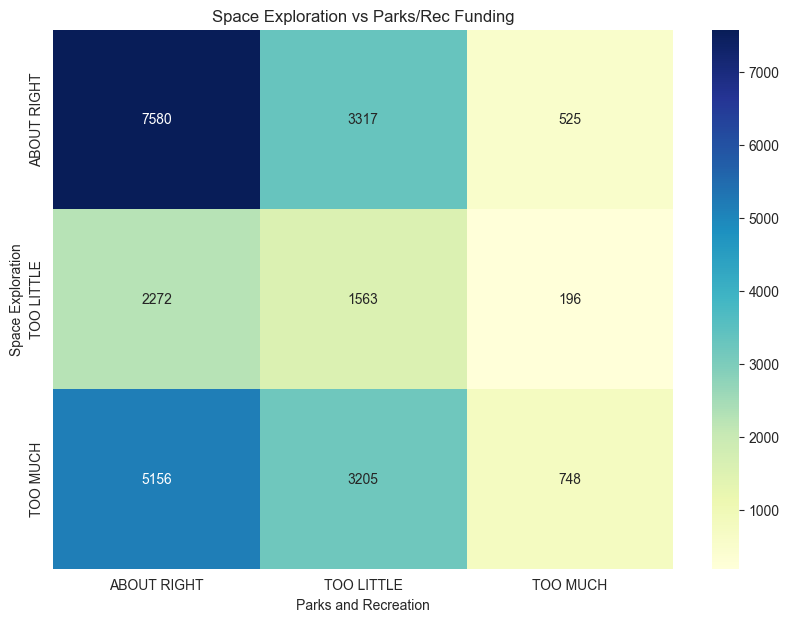

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('GSS.xlsx')

#Cleaning N/A's
Skipped = [".s:  Skipped on Web",".n:  No answer",".i:  Inapplicable",".d:  Do not Know/Cannot Choose",".y:  Not available in this year"]
df = df.replace(Skipped, np.nan)
# Replaced the unknown values with N/A so they don't break conversions and charts

# Cleaning Values
df["childs"] = df["childs"].replace("8 or more", 8)
df['year'] = pd.to_numeric(df['year'])
df['childs'] = pd.to_numeric(df['childs'])
# Turned year and childs into the numeric values to help with data visualization
edu_mapping = {"No formal schooling": 0,"1st grade": 1, "2nd grade": 2, "3rd grade": 3, "4th grade": 4,"5th grade": 5, "6th grade": 6, "7th grade": 7, "8th grade": 8,"9th grade": 9, "10th grade": 10, "11th grade": 11, "12th grade": 12,"1 year of college": 13,"2 years of college": 14,"3 years of college": 15,"4 years of college": 16,"5 years of college": 17,"6 years of college": 18,"7 years of college": 19,"8 years of college": 20}
df['educ'] = df['educ'].map(edu_mapping)
# Mapped education so the order on the table looks correct, maps how many year a student has total, not showing college vs highschool as it's assumed here a full high school year is 12.


# Comparing Year and Children, had AI help me make it look good.
cross_pct = pd.crosstab(df['year'], df['childs'], normalize='index') * 100
cross_pct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Number of Children Over Time')
plt.xlabel('Year')
plt.ylabel('Respondents (%)')
plt.legend(title='Number of Children', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Comparing Education and Region
cross = pd.crosstab(df['educ'], df['region'])
cross = cross.sort_index(axis=0).sort_index(axis=1)
midwest_mean = df[df['region'] == 'Midwest']['educ'].mean()
northeast_mean = df[df['region'] == 'Northeast']['educ'].mean()
south_mean = df[df['region'] == 'South']['educ'].mean()
west_mean = df[df['region'] == 'West']['educ'].mean()
print(cross)
print("Midwest Mean: ", midwest_mean,"\nNortheast Mean:", northeast_mean, "\nSouth Mean:", south_mean,"\nWest Mean:", west_mean)

# Comparing Political Party (Main) and Space Explortation
mapping = {"Strong democrat" : 0, "Not very strong democrat" : 1, "Independent, close to democrat" : 2, "Strong republican" : 6, "Not very strong republican" : 5, "Independent, close to republican" : 4,"Independent (neither, no response)" : 3, "Other party" : np.nan}
# Cleaned this up to help it look better on a chart and also process better and in order.
df["partyid"] = df["partyid"].replace(mapping)
df["partyid"] = pd.to_numeric(df["partyid"])
sns.countplot(data=df, x='partyid', hue='natspac')
plt.title('Political Party vs Space Exploration')
plt.xlabel('Political Party (0=Strong Dem, 6=Strong Rep)')
plt.ylabel('Number of People')
plt.legend(title='Space Funding Opinion')
plt.show()

# Comparing Income and Region
df["rincome"] = df["rincome"].replace(".r:  Refused", np.nan)
cross = pd.crosstab(df['rincome'], df['region'])
print(cross)

# Comparing Exploration Program and Parks and Rec, small help from AI with formatting a heatmap
space_park_cross = pd.crosstab(df['natspac'], df['natpark'])
plt.figure(figsize=(10, 7))
sns.heatmap(space_park_cross, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Space Exploration vs Parks/Rec Funding')
plt.xlabel('Parks and Recreation')
plt.ylabel('Space Exploration')
plt.show()


So with my results I made 5 major visualizations, so I will take about each one and then talk about other information.
1. The first bar chart shows children over time, how each year the amount of children in recorded households changed. The bars are filled with color to show what percent of these households have what amount of children. While I heavily expected that the later years would decrease this, the chart only show a small marginal increase in the amount of zero children households towards the end of the years. Overall, there is not much trend here through these years between number of children and year in the United States. While this data might have been different in past years, the correlation isn't directly shown in this data. This data does show that most households in all years have 0 or 2 children, with it decreasing in percent as it goes up from there. This is interesting that on average, one child households are less common than two.
2. The second table shows the years of education to what region in the United States the person lived in. The college vs high school years was replaced with just the number of years in education total, as it assumes that a person does 12 years of high school vs college in this survey. As expected, in all regions the amount of people with 12 (HS), 14 (AS), or 16 (BS) years of education is very common and pretty stable between all of the regions. While all regions have 2-4 thousand people in the 16 year row, the high school row is completly different, with the Midwest and South having almost triple this number, while the other 2 regions have only double or less, showing that with an increase of people schooling, around the same amount still finish 16 years of schooling. This is also shown with the mean numbers, where the Northeast and West means were around 13, where the Midwest and South means were around 12. This can go with the idea of industrialization, as it started in the Northeast, and also expanded to a lot of places such as CA in the West.
3. The third visual shown is a chart of Political Party and how they feel about Space Grant Funding. Across all political parties, the amount of people that thought the funding was too little was around 1000 people. But, the amount of people who thought funding was too much greatly changed depended on political party. As the participants slowly became more and more republican, the amount of "Over" funding responses slowly decreased, and around the neutral point is when the "just right" responses became the majority. Still, both responses were highly above the "too little" responses. There was also a lot more responses under the more democratic side of the spectrum compared to the republican side, showing the lean in the USA.
4. The fourth table shows a comparison between regions of the United States, just like in part 2, and income ranges. The first thing to note is that the majority of people are in the 10k and above range, with a large number of them being 25k or above, showing the big lean on income. The trends are pretty equal between all the different regions, with South being the highest in each row, and Northeast being the lowest, showing only a small correlation, likely due to other factors, between the region a person is living in and what income they are making.
5. The final graphic is a heatmap between people favoring Space Exploration compared Parks and Rec. It shows boxes and the amount of people who want a specific result, with colors going up in brightness with an increase in people. The majority of people who thought parks and rec were about right actually thought space exploration was too high or about right, with a large chunk being on the too much side. This is completely different compared to parks and recreation, as only a small minority of people are in the "too much" category. Further so, even a decent chunk of people also thought parks and recreation was too little, and these same people had about 80% responses in the same 2 space exploration categories. What this shows is that a high majority of Americans think Parks and Recreation might need a small budget increase, and this budget should come from space exploration. Combining this with number 3, around 50% of Americans, which lean towards Democratic, would agree with lowering space grant funding.